# Tutorial of CNN using Keras with Theano backend
## Environment setup
Python3 uses Tensorflow as default backend. 
So we have to export environment variable `KERAS_BACKEND`
to specify the backend we are using.

In [1]:
import os
os.environ['KERAS_BACKEND']='theano'
! echo ${KERAS_BACKEND}

theano


Then we are able to import Theano and keras and see their versions.

In [2]:
import theano
import keras

print (theano.__version__)
print (keras.__version__)

Using Theano backend.


1.0.1
2.1.4


The libraries we are going to use are imported here.

In [3]:
import numpy as np
# models
from keras.models import Sequential
# core layers
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
# utilities
from keras.utils import np_utils, plot_model
# plotting
from matplotlib import pyplot as plt

## Download the MNIST images
The Keras library has it already!

In [13]:
from keras.datasets import mnist
 
# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [14]:
print (X_train.shape)
# (60000, 28, 28)

(60000, 28, 28)


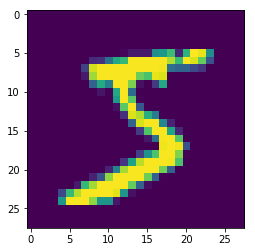

In [15]:
plt.imshow(X_train[0])

## Prepocessing the data
Images are reshaped to tensor of size 1x28x28 and $[0,1]$ float data.

In [16]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

print (X_train.shape)

(60000, 28, 28, 1)


Labels are transformed from label name to one-hot encoded categorical by using `to_categorical`

In [17]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print("original label: ", y_test[0])
print("one-hot encoded label: ", Y_test[0])

original label:  7
one-hot encoded label:  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


## Model bulidup
We use Keras `sequential` to build our model.
(Document here: https://keras.io/getting-started/sequential-model-guide/)
For feature layers,
we build a model with 2 layers of CNN with ReLU as activation function.
After that there is a max pooling layer and a dropout layer.
For classification layers,
we first flatten out the layers and use a fully connected layer.
Then dropout again and another fully connected layer ended with a soft-max classifier.

In [23]:
# first define the model to be sequential
model = Sequential()
# feature layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
# classifier layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

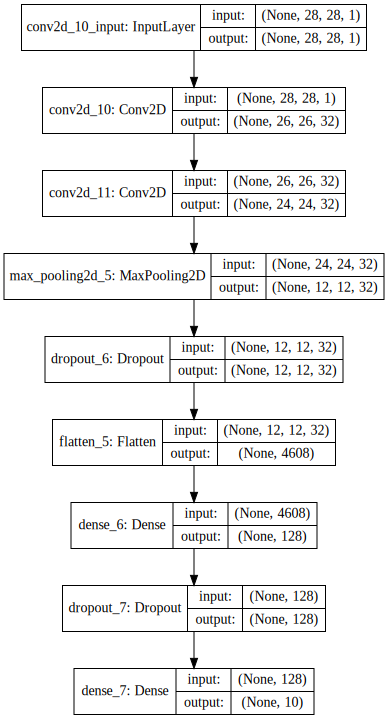

In [24]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes='True').create(prog='dot', format='svg'))

In [25]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [28]:
model.fit(X_train, Y_train, 
          batch_size=32, epochs=10, verbose=1)

INFO (theano.gof.compilelock): Refreshing lock /home/minan/.theano/compiledir_Linux-4.13--generic-x86_64-with-Ubuntu-16.04-xenial-x86_64-3.5.2-64/lock_dir/lock
Problem occurred during compilation with the command line below:
/usr/bin/g++ -shared -g -O3 -fno-math-errno -Wno-unused-label -Wno-unused-variable -Wno-write-strings -march=haswell -mmmx -mno-3dnow -msse -msse2 -msse3 -mssse3 -mno-sse4a -mcx16 -msahf -mmovbe -maes -mno-sha -mpclmul -mpopcnt -mabm -mno-lwp -mfma -mno-fma4 -mno-xop -mbmi -mbmi2 -mno-tbm -mavx -mavx2 -msse4.2 -msse4.1 -mlzcnt -mno-rtm -mno-hle -mrdrnd -mf16c -mfsgsbase -mno-rdseed -mno-prfchw -mno-adx -mfxsr -mxsave -mxsaveopt -mno-avx512f -mno-avx512er -mno-avx512cd -mno-avx512pf -mno-prefetchwt1 -mno-clflushopt -mno-xsavec -mno-xsaves -mno-avx512dq -mno-avx512bw -mno-avx512vl -mno-avx512ifma -mno-avx512vbmi -mno-clwb -mno-pcommit -mno-mwaitx --param l1-cache-size=32 --param l1-cache-line-size=64 --param l2-cache-size=3072 -mtune=haswell -DNPY_NO_DEPRECATED_API=N

ERROR (theano.gof.opt): Optimization failure due to: constant_folding
ERROR (theano.gof.opt): node: Subtensor{int64}(TensorConstant{(2,) of 2}, Constant{1})
ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "/home/minan/.virtualenvs/ve-py3/lib/python3.5/site-packages/theano/gof/opt.py", line 2019, in process_node
    replacements = lopt.transform(node)
  File "/home/minan/.virtualenvs/ve-py3/lib/python3.5/site-packages/theano/tensor/opt.py", line 6507, in constant_folding
    no_recycling=[], impl=impl)
  File "/home/minan/.virtualenvs/ve-py3/lib/python3.5/site-packages/theano/gof/op.py", line 955, in make_thunk
    no_recycling)
  File "/home/minan/.virtualenvs/ve-py3/lib/python3.5/site-packages/theano/gof/op.py", line 858, in make_c_thunk
    output_storage=node_output_storage)
  File "/home/minan/.virtualenvs/ve-py3/lib/python3.5/site-packages/theano/gof/cc.py", line 1217, in make_thunk
    keep_lock=keep_lock)
  File "/home/minan/.

Problem occurred during compilation with the command line below:
/usr/bin/g++ -shared -g -O3 -fno-math-errno -Wno-unused-label -Wno-unused-variable -Wno-write-strings -march=haswell -mmmx -mno-3dnow -msse -msse2 -msse3 -mssse3 -mno-sse4a -mcx16 -msahf -mmovbe -maes -mno-sha -mpclmul -mpopcnt -mabm -mno-lwp -mfma -mno-fma4 -mno-xop -mbmi -mbmi2 -mno-tbm -mavx -mavx2 -msse4.2 -msse4.1 -mlzcnt -mno-rtm -mno-hle -mrdrnd -mf16c -mfsgsbase -mno-rdseed -mno-prfchw -mno-adx -mfxsr -mxsave -mxsaveopt -mno-avx512f -mno-avx512er -mno-avx512cd -mno-avx512pf -mno-prefetchwt1 -mno-clflushopt -mno-xsavec -mno-xsaves -mno-avx512dq -mno-avx512bw -mno-avx512vl -mno-avx512ifma -mno-avx512vbmi -mno-clwb -mno-pcommit -mno-mwaitx --param l1-cache-size=32 --param l1-cache-line-size=64 --param l2-cache-size=3072 -mtune=haswell -DNPY_NO_DEPRECATED_API=NPY_1_7_API_VERSION -m64 -fPIC -I/home/minan/.virtualenvs/ve-py3/lib/python3.5/site-packages/numpy/core/include -I/usr/include/python3.5m -I/home/minan/.virtuale

ERROR (theano.gof.opt): Optimization failure due to: constant_folding
ERROR (theano.gof.opt): node: MakeVector{dtype='int64'}(TensorConstant{26}, TensorConstant{26})
ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "/home/minan/.virtualenvs/ve-py3/lib/python3.5/site-packages/theano/gof/opt.py", line 2019, in process_node
    replacements = lopt.transform(node)
  File "/home/minan/.virtualenvs/ve-py3/lib/python3.5/site-packages/theano/tensor/opt.py", line 6507, in constant_folding
    no_recycling=[], impl=impl)
  File "/home/minan/.virtualenvs/ve-py3/lib/python3.5/site-packages/theano/gof/op.py", line 955, in make_thunk
    no_recycling)
  File "/home/minan/.virtualenvs/ve-py3/lib/python3.5/site-packages/theano/gof/op.py", line 858, in make_c_thunk
    output_storage=node_output_storage)
  File "/home/minan/.virtualenvs/ve-py3/lib/python3.5/site-packages/theano/gof/cc.py", line 1217, in make_thunk
    keep_lock=keep_lock)
  File "/hom

Problem occurred during compilation with the command line below:
/usr/bin/g++ -shared -g -O3 -fno-math-errno -Wno-unused-label -Wno-unused-variable -Wno-write-strings -march=haswell -mmmx -mno-3dnow -msse -msse2 -msse3 -mssse3 -mno-sse4a -mcx16 -msahf -mmovbe -maes -mno-sha -mpclmul -mpopcnt -mabm -mno-lwp -mfma -mno-fma4 -mno-xop -mbmi -mbmi2 -mno-tbm -mavx -mavx2 -msse4.2 -msse4.1 -mlzcnt -mno-rtm -mno-hle -mrdrnd -mf16c -mfsgsbase -mno-rdseed -mno-prfchw -mno-adx -mfxsr -mxsave -mxsaveopt -mno-avx512f -mno-avx512er -mno-avx512cd -mno-avx512pf -mno-prefetchwt1 -mno-clflushopt -mno-xsavec -mno-xsaves -mno-avx512dq -mno-avx512bw -mno-avx512vl -mno-avx512ifma -mno-avx512vbmi -mno-clwb -mno-pcommit -mno-mwaitx --param l1-cache-size=32 --param l1-cache-line-size=64 --param l2-cache-size=3072 -mtune=haswell -DNPY_NO_DEPRECATED_API=NPY_1_7_API_VERSION -m64 -fPIC -I/home/minan/.virtualenvs/ve-py3/lib/python3.5/site-packages/numpy/core/include -I/usr/include/python3.5m -I/home/minan/.virtuale

ERROR (theano.gof.opt): Optimization failure due to: constant_folding
ERROR (theano.gof.opt): node: Subtensor{int64}(TensorConstant{(2,) of 2}, Constant{0})
ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "/home/minan/.virtualenvs/ve-py3/lib/python3.5/site-packages/theano/gof/opt.py", line 2019, in process_node
    replacements = lopt.transform(node)
  File "/home/minan/.virtualenvs/ve-py3/lib/python3.5/site-packages/theano/tensor/opt.py", line 6507, in constant_folding
    no_recycling=[], impl=impl)
  File "/home/minan/.virtualenvs/ve-py3/lib/python3.5/site-packages/theano/gof/op.py", line 955, in make_thunk
    no_recycling)
  File "/home/minan/.virtualenvs/ve-py3/lib/python3.5/site-packages/theano/gof/op.py", line 858, in make_c_thunk
    output_storage=node_output_storage)
  File "/home/minan/.virtualenvs/ve-py3/lib/python3.5/site-packages/theano/gof/cc.py", line 1217, in make_thunk
    keep_lock=keep_lock)
  File "/home/minan/.

Problem occurred during compilation with the command line below:
/usr/bin/g++ -shared -g -O3 -fno-math-errno -Wno-unused-label -Wno-unused-variable -Wno-write-strings -march=haswell -mmmx -mno-3dnow -msse -msse2 -msse3 -mssse3 -mno-sse4a -mcx16 -msahf -mmovbe -maes -mno-sha -mpclmul -mpopcnt -mabm -mno-lwp -mfma -mno-fma4 -mno-xop -mbmi -mbmi2 -mno-tbm -mavx -mavx2 -msse4.2 -msse4.1 -mlzcnt -mno-rtm -mno-hle -mrdrnd -mf16c -mfsgsbase -mno-rdseed -mno-prfchw -mno-adx -mfxsr -mxsave -mxsaveopt -mno-avx512f -mno-avx512er -mno-avx512cd -mno-avx512pf -mno-prefetchwt1 -mno-clflushopt -mno-xsavec -mno-xsaves -mno-avx512dq -mno-avx512bw -mno-avx512vl -mno-avx512ifma -mno-avx512vbmi -mno-clwb -mno-pcommit -mno-mwaitx --param l1-cache-size=32 --param l1-cache-line-size=64 --param l2-cache-size=3072 -mtune=haswell -DNPY_NO_DEPRECATED_API=NPY_1_7_API_VERSION -m64 -fPIC -I/home/minan/.virtualenvs/ve-py3/lib/python3.5/site-packages/numpy/core/include -I/usr/include/python3.5m -I/home/minan/.virtuale

ERROR (theano.gof.opt): Optimization failure due to: constant_folding
ERROR (theano.gof.opt): node: Subtensor{int64}(TensorConstant{(2,) of 2}, Constant{1})
ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "/home/minan/.virtualenvs/ve-py3/lib/python3.5/site-packages/theano/gof/opt.py", line 2019, in process_node
    replacements = lopt.transform(node)
  File "/home/minan/.virtualenvs/ve-py3/lib/python3.5/site-packages/theano/tensor/opt.py", line 6507, in constant_folding
    no_recycling=[], impl=impl)
  File "/home/minan/.virtualenvs/ve-py3/lib/python3.5/site-packages/theano/gof/op.py", line 955, in make_thunk
    no_recycling)
  File "/home/minan/.virtualenvs/ve-py3/lib/python3.5/site-packages/theano/gof/op.py", line 858, in make_c_thunk
    output_storage=node_output_storage)
  File "/home/minan/.virtualenvs/ve-py3/lib/python3.5/site-packages/theano/gof/cc.py", line 1217, in make_thunk
    keep_lock=keep_lock)
  File "/home/minan/.

Problem occurred during compilation with the command line below:
/usr/bin/g++ -shared -g -O3 -fno-math-errno -Wno-unused-label -Wno-unused-variable -Wno-write-strings -march=haswell -mmmx -mno-3dnow -msse -msse2 -msse3 -mssse3 -mno-sse4a -mcx16 -msahf -mmovbe -maes -mno-sha -mpclmul -mpopcnt -mabm -mno-lwp -mfma -mno-fma4 -mno-xop -mbmi -mbmi2 -mno-tbm -mavx -mavx2 -msse4.2 -msse4.1 -mlzcnt -mno-rtm -mno-hle -mrdrnd -mf16c -mfsgsbase -mno-rdseed -mno-prfchw -mno-adx -mfxsr -mxsave -mxsaveopt -mno-avx512f -mno-avx512er -mno-avx512cd -mno-avx512pf -mno-prefetchwt1 -mno-clflushopt -mno-xsavec -mno-xsaves -mno-avx512dq -mno-avx512bw -mno-avx512vl -mno-avx512ifma -mno-avx512vbmi -mno-clwb -mno-pcommit -mno-mwaitx --param l1-cache-size=32 --param l1-cache-line-size=64 --param l2-cache-size=3072 -mtune=haswell -DNPY_NO_DEPRECATED_API=NPY_1_7_API_VERSION -m64 -fPIC -I/home/minan/.virtualenvs/ve-py3/lib/python3.5/site-packages/numpy/core/include -I/usr/include/python3.5m -I/home/minan/.virtuale

ERROR (theano.gof.opt): Optimization failure due to: constant_folding
ERROR (theano.gof.opt): node: MakeVector{dtype='int64'}(TensorConstant{26}, TensorConstant{26})
ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "/home/minan/.virtualenvs/ve-py3/lib/python3.5/site-packages/theano/gof/opt.py", line 2019, in process_node
    replacements = lopt.transform(node)
  File "/home/minan/.virtualenvs/ve-py3/lib/python3.5/site-packages/theano/tensor/opt.py", line 6507, in constant_folding
    no_recycling=[], impl=impl)
  File "/home/minan/.virtualenvs/ve-py3/lib/python3.5/site-packages/theano/gof/op.py", line 955, in make_thunk
    no_recycling)
  File "/home/minan/.virtualenvs/ve-py3/lib/python3.5/site-packages/theano/gof/op.py", line 858, in make_c_thunk
    output_storage=node_output_storage)
  File "/home/minan/.virtualenvs/ve-py3/lib/python3.5/site-packages/theano/gof/cc.py", line 1217, in make_thunk
    keep_lock=keep_lock)
  File "/hom

Problem occurred during compilation with the command line below:
/usr/bin/g++ -shared -g -O3 -fno-math-errno -Wno-unused-label -Wno-unused-variable -Wno-write-strings -march=haswell -mmmx -mno-3dnow -msse -msse2 -msse3 -mssse3 -mno-sse4a -mcx16 -msahf -mmovbe -maes -mno-sha -mpclmul -mpopcnt -mabm -mno-lwp -mfma -mno-fma4 -mno-xop -mbmi -mbmi2 -mno-tbm -mavx -mavx2 -msse4.2 -msse4.1 -mlzcnt -mno-rtm -mno-hle -mrdrnd -mf16c -mfsgsbase -mno-rdseed -mno-prfchw -mno-adx -mfxsr -mxsave -mxsaveopt -mno-avx512f -mno-avx512er -mno-avx512cd -mno-avx512pf -mno-prefetchwt1 -mno-clflushopt -mno-xsavec -mno-xsaves -mno-avx512dq -mno-avx512bw -mno-avx512vl -mno-avx512ifma -mno-avx512vbmi -mno-clwb -mno-pcommit -mno-mwaitx --param l1-cache-size=32 --param l1-cache-line-size=64 --param l2-cache-size=3072 -mtune=haswell -DNPY_NO_DEPRECATED_API=NPY_1_7_API_VERSION -m64 -fPIC -I/home/minan/.virtualenvs/ve-py3/lib/python3.5/site-packages/numpy/core/include -I/usr/include/python3.5m -I/home/minan/.virtuale

ERROR (theano.gof.opt): Optimization failure due to: constant_folding
ERROR (theano.gof.opt): node: Subtensor{int64}(TensorConstant{(2,) of 2}, Constant{0})
ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "/home/minan/.virtualenvs/ve-py3/lib/python3.5/site-packages/theano/gof/opt.py", line 2019, in process_node
    replacements = lopt.transform(node)
  File "/home/minan/.virtualenvs/ve-py3/lib/python3.5/site-packages/theano/tensor/opt.py", line 6507, in constant_folding
    no_recycling=[], impl=impl)
  File "/home/minan/.virtualenvs/ve-py3/lib/python3.5/site-packages/theano/gof/op.py", line 955, in make_thunk
    no_recycling)
  File "/home/minan/.virtualenvs/ve-py3/lib/python3.5/site-packages/theano/gof/op.py", line 858, in make_c_thunk
    output_storage=node_output_storage)
  File "/home/minan/.virtualenvs/ve-py3/lib/python3.5/site-packages/theano/gof/cc.py", line 1217, in make_thunk
    keep_lock=keep_lock)
  File "/home/minan/.

Problem occurred during compilation with the command line below:
/usr/bin/g++ -shared -g -O3 -fno-math-errno -Wno-unused-label -Wno-unused-variable -Wno-write-strings -march=haswell -mmmx -mno-3dnow -msse -msse2 -msse3 -mssse3 -mno-sse4a -mcx16 -msahf -mmovbe -maes -mno-sha -mpclmul -mpopcnt -mabm -mno-lwp -mfma -mno-fma4 -mno-xop -mbmi -mbmi2 -mno-tbm -mavx -mavx2 -msse4.2 -msse4.1 -mlzcnt -mno-rtm -mno-hle -mrdrnd -mf16c -mfsgsbase -mno-rdseed -mno-prfchw -mno-adx -mfxsr -mxsave -mxsaveopt -mno-avx512f -mno-avx512er -mno-avx512cd -mno-avx512pf -mno-prefetchwt1 -mno-clflushopt -mno-xsavec -mno-xsaves -mno-avx512dq -mno-avx512bw -mno-avx512vl -mno-avx512ifma -mno-avx512vbmi -mno-clwb -mno-pcommit -mno-mwaitx --param l1-cache-size=32 --param l1-cache-line-size=64 --param l2-cache-size=3072 -mtune=haswell -DNPY_NO_DEPRECATED_API=NPY_1_7_API_VERSION -m64 -fPIC -I/home/minan/.virtualenvs/ve-py3/lib/python3.5/site-packages/numpy/core/include -I/usr/include/python3.5m -I/home/minan/.virtuale

ERROR (theano.gof.opt): Optimization failure due to: constant_folding
ERROR (theano.gof.opt): node: Subtensor{int64}(TensorConstant{(2,) of 2}, Constant{1})
ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "/home/minan/.virtualenvs/ve-py3/lib/python3.5/site-packages/theano/gof/opt.py", line 2019, in process_node
    replacements = lopt.transform(node)
  File "/home/minan/.virtualenvs/ve-py3/lib/python3.5/site-packages/theano/tensor/opt.py", line 6507, in constant_folding
    no_recycling=[], impl=impl)
  File "/home/minan/.virtualenvs/ve-py3/lib/python3.5/site-packages/theano/gof/op.py", line 955, in make_thunk
    no_recycling)
  File "/home/minan/.virtualenvs/ve-py3/lib/python3.5/site-packages/theano/gof/op.py", line 858, in make_c_thunk
    output_storage=node_output_storage)
  File "/home/minan/.virtualenvs/ve-py3/lib/python3.5/site-packages/theano/gof/cc.py", line 1217, in make_thunk
    keep_lock=keep_lock)
  File "/home/minan/.

Problem occurred during compilation with the command line below:
/usr/bin/g++ -shared -g -O3 -fno-math-errno -Wno-unused-label -Wno-unused-variable -Wno-write-strings -march=haswell -mmmx -mno-3dnow -msse -msse2 -msse3 -mssse3 -mno-sse4a -mcx16 -msahf -mmovbe -maes -mno-sha -mpclmul -mpopcnt -mabm -mno-lwp -mfma -mno-fma4 -mno-xop -mbmi -mbmi2 -mno-tbm -mavx -mavx2 -msse4.2 -msse4.1 -mlzcnt -mno-rtm -mno-hle -mrdrnd -mf16c -mfsgsbase -mno-rdseed -mno-prfchw -mno-adx -mfxsr -mxsave -mxsaveopt -mno-avx512f -mno-avx512er -mno-avx512cd -mno-avx512pf -mno-prefetchwt1 -mno-clflushopt -mno-xsavec -mno-xsaves -mno-avx512dq -mno-avx512bw -mno-avx512vl -mno-avx512ifma -mno-avx512vbmi -mno-clwb -mno-pcommit -mno-mwaitx --param l1-cache-size=32 --param l1-cache-line-size=64 --param l2-cache-size=3072 -mtune=haswell -DNPY_NO_DEPRECATED_API=NPY_1_7_API_VERSION -m64 -fPIC -I/home/minan/.virtualenvs/ve-py3/lib/python3.5/site-packages/numpy/core/include -I/usr/include/python3.5m -I/home/minan/.virtuale

ERROR (theano.gof.opt): Optimization failure due to: constant_folding
ERROR (theano.gof.opt): node: MakeVector{dtype='int64'}(TensorConstant{26}, TensorConstant{26})
ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "/home/minan/.virtualenvs/ve-py3/lib/python3.5/site-packages/theano/gof/opt.py", line 2019, in process_node
    replacements = lopt.transform(node)
  File "/home/minan/.virtualenvs/ve-py3/lib/python3.5/site-packages/theano/tensor/opt.py", line 6507, in constant_folding
    no_recycling=[], impl=impl)
  File "/home/minan/.virtualenvs/ve-py3/lib/python3.5/site-packages/theano/gof/op.py", line 955, in make_thunk
    no_recycling)
  File "/home/minan/.virtualenvs/ve-py3/lib/python3.5/site-packages/theano/gof/op.py", line 858, in make_c_thunk
    output_storage=node_output_storage)
  File "/home/minan/.virtualenvs/ve-py3/lib/python3.5/site-packages/theano/gof/cc.py", line 1217, in make_thunk
    keep_lock=keep_lock)
  File "/hom

OSError: [Errno 12] Cannot allocate memory